**TITLE OF PROJECT**- SALES PREDICTION

**OBJECTIVE**-THE ADVERTISING DATASET CAPTURES THE SALES REVENUE GENERATED WITH RESPECT TO ADVERTISMENT COSTS ACROSS MULTIPLE CHANNELS LIKE RADIO, TV AND NEWSPAPERS.

In [33]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
#IMPORT DATASET
df=pd.read_csv(r'https://github.com/PrashantSharma30/CODSOFT/raw/main/advertising.csv')

In [35]:
#DESCRIBING DATASET
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [36]:
df.nunique()

TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [38]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [39]:
#CHECKING FOR NULL VALUES
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<Axes: >

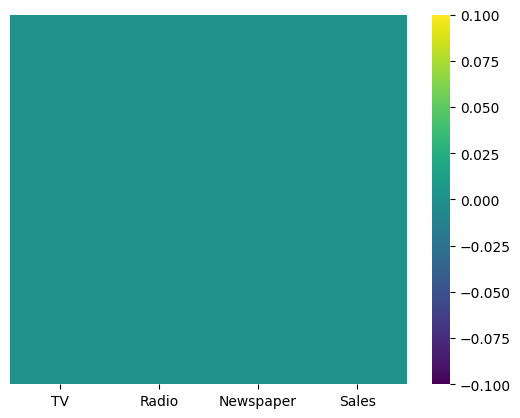

In [40]:
#REPRESENTATION OF NULL VALUES
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

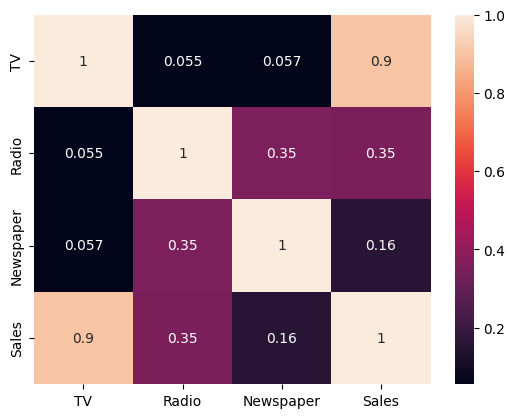

In [41]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

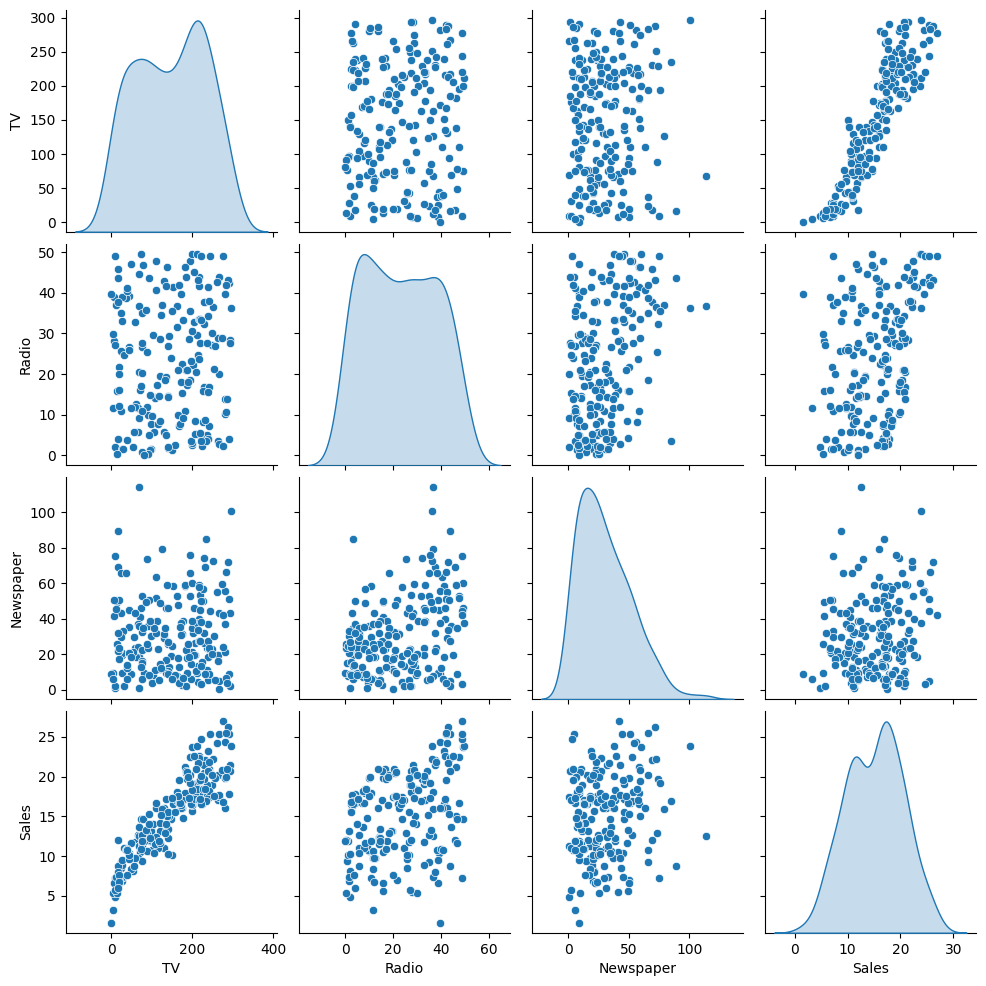

In [42]:
#DATA VISUALIZATION
sns.pairplot(df, diag_kind='kde')

<Axes: xlabel='Sales', ylabel='Count'>

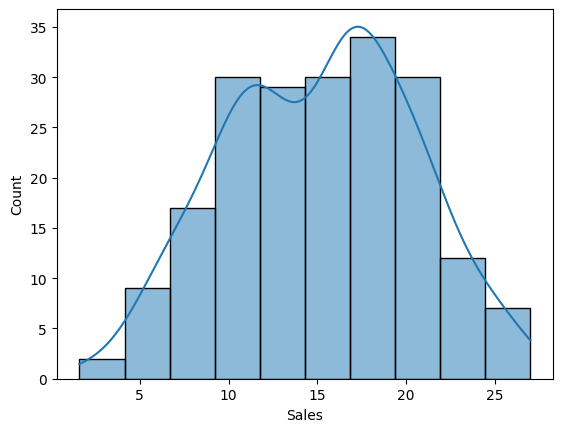

In [43]:
sns.histplot(df['Sales'] , kde=True)

<ipython-input-44-87032c1a53f4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'])


<Axes: xlabel='Sales', ylabel='Density'>

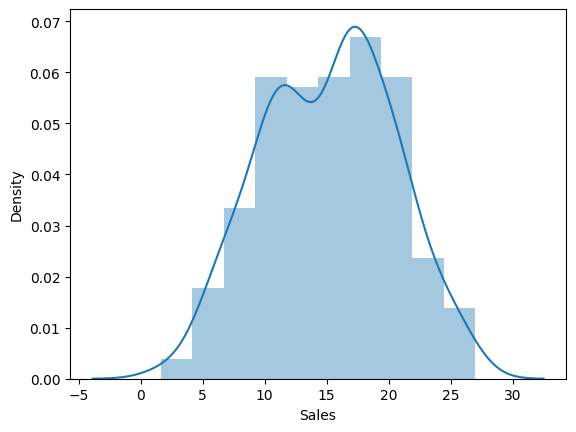

In [44]:
sns.distplot(df['Sales'])

In [45]:
#DEFINE TARGET VARIABLE Y AND FEATURE X
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
y=df['Sales']
y.shape

In [ ]:
X=df.drop('Sales', axis=1)
X.shape

In [73]:
from sklearn.preprocessing import PolynomialFeatures
ploynomialConvertor = PolynomialFeatures(degree=3 , include_bias=False)
polyFeatures = ploynomialConvertor.fit_transform(X)
polyFeatures.shape

(200, 19)

In [74]:
#TRAIN TEST SPLIT DATA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(polyFeatures, y, test_size=0.3, random_state=101)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((140, 19), (60, 19), (140,), (60,))

In [75]:
#Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [76]:
model.intercept_

4.4353069474643405

In [77]:
model.coef_

array([ 8.87990942e-02,  1.05367692e-01, -2.99213818e-02, -1.15494916e-04,
        1.43170725e-04, -6.87725979e-04, -6.72344028e-03,  3.66324387e-03,
        9.22992477e-04, -5.29971684e-08, -7.03162017e-07,  1.65423945e-06,
        9.62901379e-06,  3.95947184e-06, -1.97279194e-07,  1.07126362e-04,
       -4.22467236e-05, -2.89902725e-05,  6.90535024e-07])

In [78]:
#Predict test data
y_pred = model.predict(X_test)
y_pred

array([14.10865387, 20.27110066, 13.28784408, 16.38596337,  7.5515033 ,
        6.9821258 , 20.70763756, 18.75641055, 13.96215824, 20.12131211,
        9.09011967, 16.95855144, 17.19589337, 22.63503428, 19.06203413,
        9.02404748, 17.8478248 , 11.46826509,  9.00407348, 21.34510783,
        6.89140638, 18.94797058, 27.01049186, 24.01053345, 10.56557228,
       15.36729302, 20.92278245,  9.99597132, 15.56759191,  8.50856673,
        8.9573756 , 20.13993077, 13.96791301,  7.74859432, 18.13658208,
       10.62110814, 11.410028  , 11.70994123,  7.4261598 , 14.90060481,
       12.27065138, 12.98559194, 12.1918793 ,  8.19747859, 11.42824634,
       10.66948058,  5.35398922, 18.09668072, 15.84392931, 22.13912777,
       10.15593287, 16.70137109, 18.9193938 , 13.77381935, 15.85078511,
        5.337777  , 24.16945874,  9.17127458, 19.94088506, 16.81002972])

In [79]:
#Model Accuracy
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error,mean_squared_error
mean_absolute_percentage_error(y_test,y_pred)

0.09307280971722154

In [80]:
mean_absolute_error(y_test,y_pred)

1.0595105718388982

In [81]:
mean_squared_error(y_test,y_pred)

2.0504080621901353